# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric" #+ lat, lon
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | kushiro
Processing Record 6 of Set 1 | fairbanks
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ukholovo
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | stornoway
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | emerald
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | viedma
Processing Record 22 of Set 1 | malkara
Proces

Processing Record 37 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 38 of Set 4 | sitka
Processing Record 39 of Set 4 | kaitangata
Processing Record 40 of Set 4 | mehamn
Processing Record 41 of Set 4 | ilulissat
Processing Record 42 of Set 4 | hami
Processing Record 43 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 44 of Set 4 | ridgecrest
Processing Record 45 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | huilong
Processing Record 48 of Set 4 | sri aman
Processing Record 49 of Set 4 | linhares
Processing Record 0 of Set 5 | domna
Processing Record 1 of Set 5 | pavlodar
Processing Record 2 of Set 5 | dunedin
Processing Record 3 of Set 5 | saint george
Processing Record 4 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 5 | abu samrah
Processing Record 6 of Set 5 | barawe
City not found. Skipping...
Processing Record 7 of Set 5 | oist

Processing Record 22 of Set 8 | dubbo
Processing Record 23 of Set 8 | mittagong
Processing Record 24 of Set 8 | port-gentil
Processing Record 25 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 26 of Set 8 | douentza
Processing Record 27 of Set 8 | biak
Processing Record 28 of Set 8 | saleaula
City not found. Skipping...
Processing Record 29 of Set 8 | hamilton
Processing Record 30 of Set 8 | marv dasht
City not found. Skipping...
Processing Record 31 of Set 8 | pavlovsk
Processing Record 32 of Set 8 | correntina
Processing Record 33 of Set 8 | komsomolskiy
Processing Record 34 of Set 8 | beringovskiy
Processing Record 35 of Set 8 | ahipara
Processing Record 36 of Set 8 | los llanos de aridane
Processing Record 37 of Set 8 | charters towers
Processing Record 38 of Set 8 | kavieng
Processing Record 39 of Set 8 | dillon
Processing Record 40 of Set 8 | ler
Processing Record 41 of Set 8 | alikalia
Processing Record 42 of Set 8 | tessalit
Processing Record 43 of Set 8 | fl

Processing Record 9 of Set 12 | bom jesus do galho
Processing Record 10 of Set 12 | takoradi
Processing Record 11 of Set 12 | cap malheureux
Processing Record 12 of Set 12 | danville
Processing Record 13 of Set 12 | isangel
Processing Record 14 of Set 12 | gambela
Processing Record 15 of Set 12 | zima
Processing Record 16 of Set 12 | darab
Processing Record 17 of Set 12 | khomeynishahr
City not found. Skipping...
Processing Record 18 of Set 12 | ganzhou
Processing Record 19 of Set 12 | olkhovka
Processing Record 20 of Set 12 | ponta do sol
Processing Record 21 of Set 12 | matiri
Processing Record 22 of Set 12 | ayan
Processing Record 23 of Set 12 | madang
Processing Record 24 of Set 12 | kemijarvi
Processing Record 25 of Set 12 | thoen
Processing Record 26 of Set 12 | antalya
Processing Record 27 of Set 12 | chimbote
Processing Record 28 of Set 12 | pozo colorado
Processing Record 29 of Set 12 | addis zemen
City not found. Skipping...
Processing Record 30 of Set 12 | cayenne
Processing

In [27]:
city_weather

{'coord': {'lon': -76.2, 'lat': 24.9},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 24.71,
  'feels_like': 25.33,
  'temp_min': 24.71,
  'temp_max': 24.71,
  'pressure': 1014,
  'humidity': 80,
  'sea_level': 1014,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 5.11, 'deg': 125, 'gust': 5.12},
 'clouds': {'all': 8},
 'dt': 1681422331,
 'sys': {'country': 'BS', 'sunrise': 1681382673, 'sunset': 1681428345},
 'timezone': -14400,
 'id': 3571592,
 'name': 'Rock Sound',
 'cod': 200}

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,6.81,70,0,0.51,AR,1681422079
1,albany,42.6001,-73.9662,30.23,54,3,3.85,US,1681421999
2,port elizabeth,-33.9180,25.5701,17.16,63,0,4.63,ZA,1681422080
3,kushiro,42.9750,144.3747,6.01,81,0,1.95,JP,1681422080
4,fairbanks,64.8378,-147.7164,-7.73,64,75,2.57,US,1681422000


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.81,70,0,0.51,AR,1681422079
1,albany,42.6001,-73.9662,30.23,54,3,3.85,US,1681421999
2,port elizabeth,-33.9180,25.5701,17.16,63,0,4.63,ZA,1681422080
3,kushiro,42.9750,144.3747,6.01,81,0,1.95,JP,1681422080
4,fairbanks,64.8378,-147.7164,-7.73,64,75,2.57,US,1681422000


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

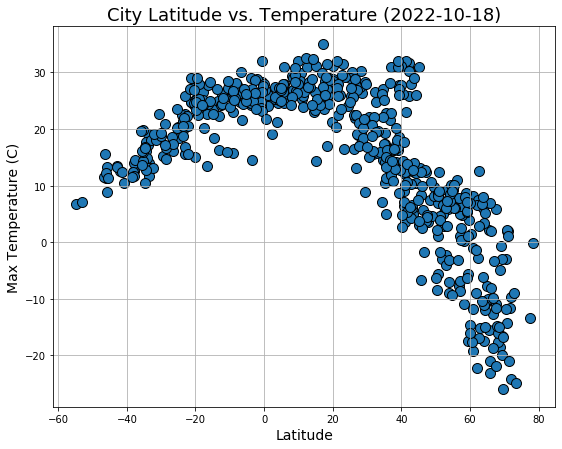

In [58]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=1,s=100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2022-10-18)",fontsize=18)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Max Temperature (C)",fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

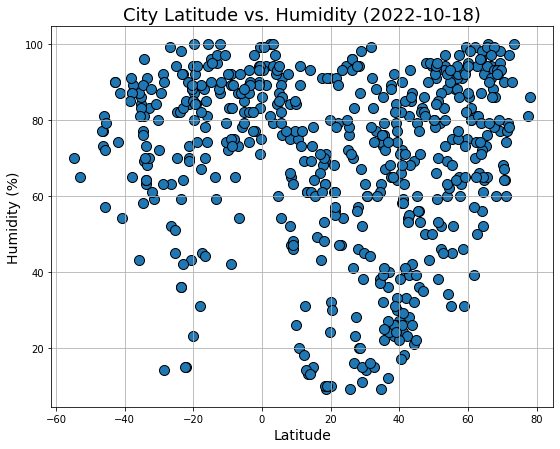

In [61]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=1,s=100)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)",fontsize=18)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Humidity (%)",fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

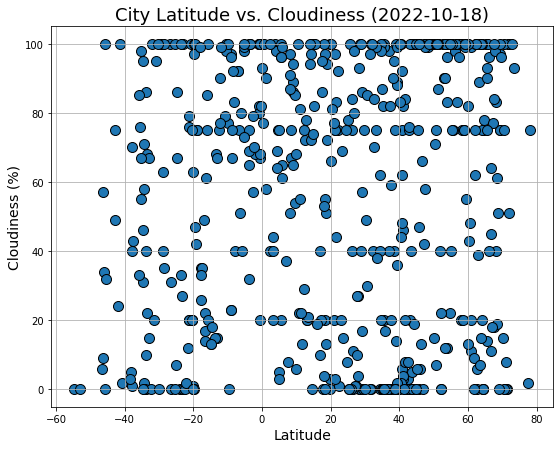

In [63]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=1,s=100)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)",fontsize=18)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Cloudiness (%)",fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

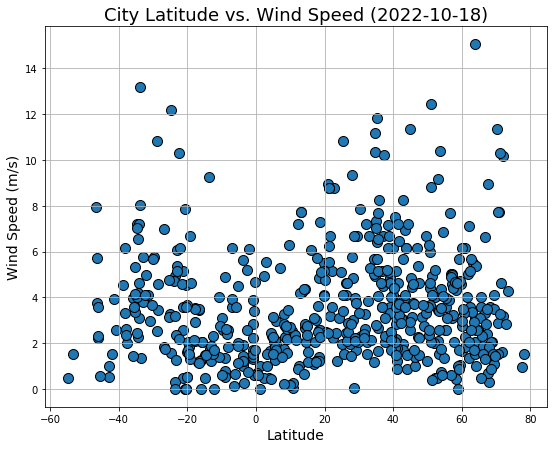

In [72]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=1,s=100)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)",fontsize=18)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Wind Speed (m/s)",fontsize=14)
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [128]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x, y, x_label, y_label, title):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_value = x * slope + intercept
    
    
    plt.scatter(x, y, s=50, edgecolor="black", alpha = 0.75)
    plt.plot(x, regress_value, "r-")
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.title(title,fontsize=18)
    
    eq = f'y = {slope:.2f}x + {intercept:.2f}'
    x_pos = x.min() + (x.max() - x.min()) * 0.05
    y_pos = y.min() + (y.max() - y.min()) * 0.85
    plt.text(x_pos, y_pos, eq, fontsize=20, color='red')

    plt.show()
    

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,30.23,54,3,3.85,US,1681421999
3,kushiro,42.9750,144.3747,6.01,81,0,1.95,JP,1681422080
4,fairbanks,64.8378,-147.7164,-7.73,64,75,2.57,US,1681422000
5,ribeira grande,38.5167,-28.7000,17.10,92,95,7.15,PT,1681422081
8,kapaa,22.0752,-159.3190,25.99,79,75,5.14,US,1681422083


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.81,70,0,0.51,AR,1681422079
2,port elizabeth,-33.9180,25.5701,17.16,63,0,4.63,ZA,1681422080
6,mount gambier,-37.8333,140.7667,12.55,87,1,2.61,AU,1681422082
7,mataura,-46.1927,168.8643,11.38,77,9,3.74,NZ,1681422083
10,rikitea,-23.1203,-134.9692,22.57,92,100,6.05,PF,1681422085


###  Temperature vs. Latitude Linear Regression Plot

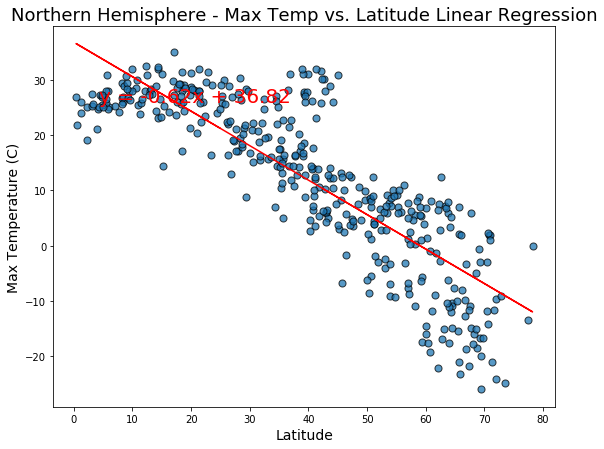

In [129]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.figure(figsize=(9,7))
linear_reg_plot(x_values, y_values, "Latitude", "Max Temperature (C)", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression")


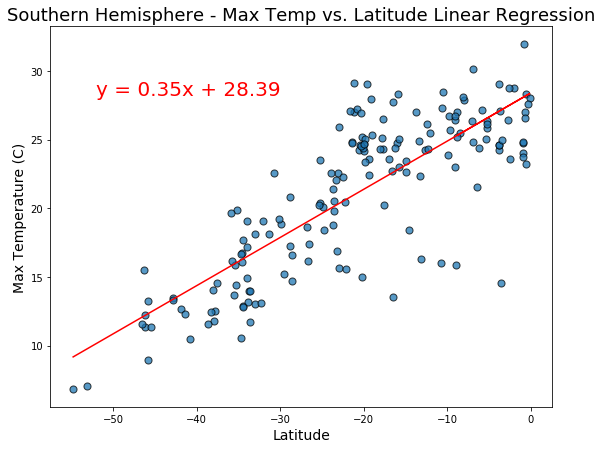

In [130]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


plt.figure(figsize=(9,7))
linear_reg_plot(x_values, y_values, "Latitude", "Max Temperature (C)", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

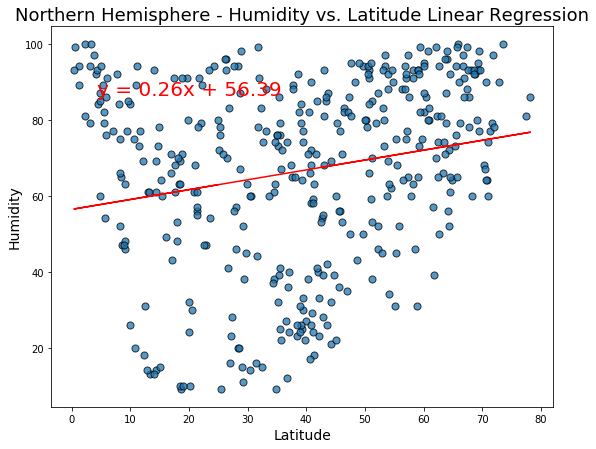

In [131]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.figure(figsize=(9,7))
linear_reg_plot(x_values, y_values, "Latitude", "Humidity", "Northern Hemisphere - Humidity vs. Latitude Linear Regression")


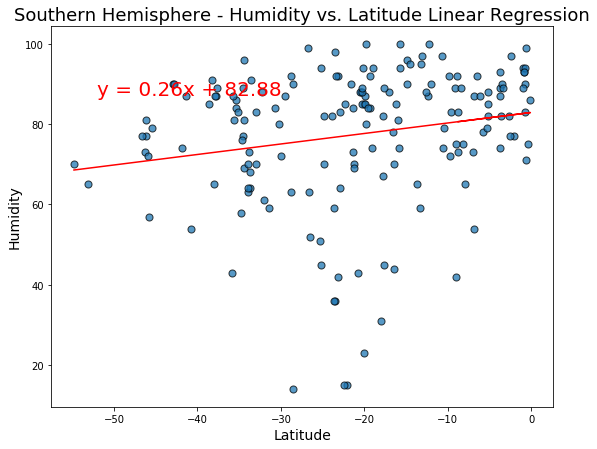

In [132]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.figure(figsize=(9,7))
linear_reg_plot(x_values, y_values, "Latitude", "Humidity", "Southern Hemisphere - Humidity vs. Latitude Linear Regression")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

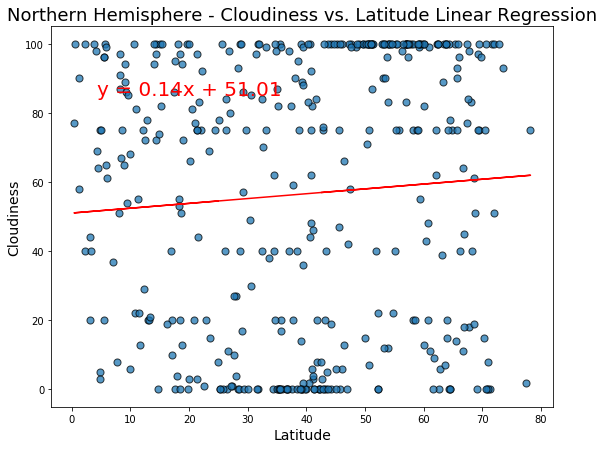

In [133]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.figure(figsize=(9,7))
linear_reg_plot(x_values, y_values, "Latitude", "Cloudiness", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")


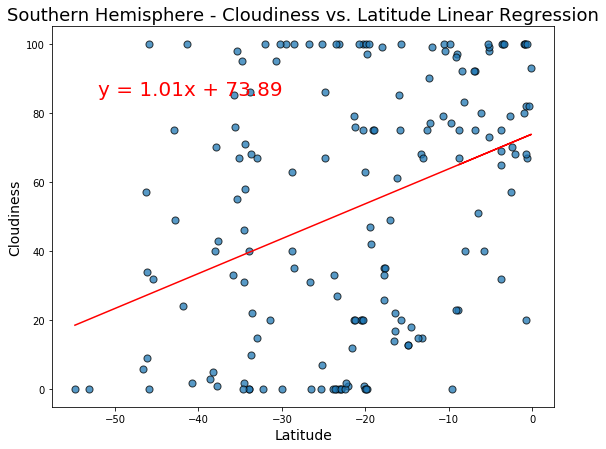

In [134]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.figure(figsize=(9,7))
linear_reg_plot(x_values, y_values, "Latitude", "Cloudiness", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

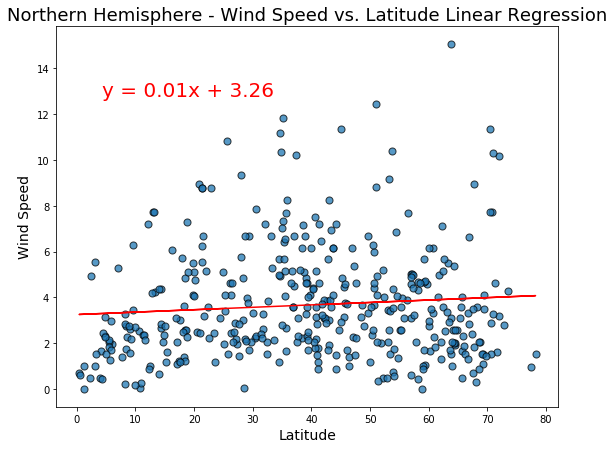

In [135]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.figure(figsize=(9,7))
linear_reg_plot(x_values, y_values, "Latitude", "Wind Speed", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")


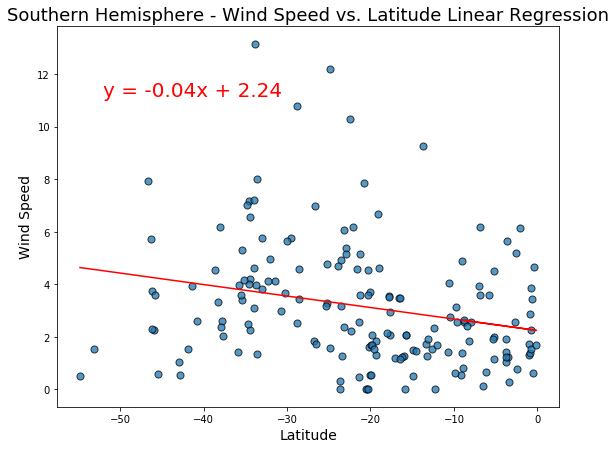

In [136]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.figure(figsize=(9,7))
linear_reg_plot(x_values, y_values, "Latitude", "Wind Speed", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Temperature vs. Latitude Linear Regression Plot

Northern Hemisphere: there is a positive relationship between temperature and latitude. As latitude increases so does the temperature. we see here that the y intercept is at 36.82 meaning that at sea level or latitude 0, the temperature is at 36.82 degrees C.  

Southern Hemisphere: Also shows a positive relationship between temperature and latitude but with a smaller slope (0.62 vs 0.35) meaning the relation isnt as strong and also the y intercept is at 28.39 meaning it's a lot colder when latitude is at 0. 



Humidity vs. Latitude Linear Regression Plot

Northern Hemisphere: There is a positive relationship between humidity and latitude, for ever 1 degree of latitude, there is 0.26% increase in humidity. not a very large increase 

Southern Hemisphere:There is also a positive relationship between humidity and latitude, and it seems the south and north have the same increase of humidity for every degree of latitude increased. However, in the south we start at a much higher percent of humidity with the y interceot being 82.88.It is way more humid in the southern hemimsphere.


Cloudiness vs. Latitude Linear Regression Plot

Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
The linear regression of cloudiness and latitude has a positive slope of 0.14.
This means the higher in latitudes there is an increase in cloudiness.
There is however a lot of variation in the data which means the r squared value is very low so the relationship 
between these two variables isn't strong. 

southern Hemisphere: There is a positive correlation between cloudiness and latitude. 
So, the lower latitudes the more cloudiness increases. 
However, it is important to keep in mind that correlation does NOT  mean causation, and given the high variance of the graph, the two variables don't have to be correlated.


Wind Speed vs. Latitude Linear Regression Plot

Northern Hemisphere: There is a weak positive correlation between wind speed and latitude in the northern hemisphere. 
As latitude increases, wind speed tends to slightly increase. 
However, since the slope is small (0.01), the correlation is considered weak.

Southern Hemisphere: Southern Hemisphere indicates a weak negative correlation between wind speed and latitude